In [70]:
#import libraries
import os
import requests
import json
import numpy as np
import tensorflow as tf
import pandas as pd
from config import api_key
from pprint import pprint
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report
from sklearn.svm import SVC 
import matplotlib.pyplot as plt

import numpy as np


In [71]:
#set up api request
url = "https://play.limitlesstcg.com/api"
api_key = "key="+ api_key
query = "game=PTCG&format=standard&limit=100&"
tournamentid = ""

In [72]:
#create api request
response = requests.get(url+"/tournaments/"+tournamentid+"?"+query+api_key)

In [73]:
#store api response
tournaments = response.json()
tournaments

[{'game': 'PTCG',
  'name': 'The Discard Pile Webcam Tourney ',
  'date': '2023-05-31T21:00:00.000Z',
  'format': 'STANDARD',
  'id': '647022009b9f5808497a9d2c',
  'players': 11},
 {'game': 'PTCG',
  'name': 'The Discard Pile Weekly #19 (Standard) ',
  'date': '2023-05-31T12:00:00.000Z',
  'format': 'STANDARD',
  'id': '646e56d19b9f5808497a93fc',
  'players': 34},
 {'game': 'PTCG',
  'name': 'Late Night #104 on PTCG Live | Road to Japan',
  'date': '2023-05-30T23:00:00.000Z',
  'format': 'STANDARD',
  'id': '640677ec24ea2b561a98792e',
  'players': 242},
 {'game': 'PTCG',
  'name': 'Late Night #103 on PTCG Live | Road to Japan',
  'date': '2023-05-30T16:00:00.000Z',
  'format': 'STANDARD',
  'id': '6406779924ea2b561a98792c',
  'players': 177},
 {'game': 'PTCG',
  'name': 'Free entry ║ Deck Out Mondays ║ 200 codes',
  'date': '2023-05-30T00:00:00.000Z',
  'format': 'STANDARD',
  'id': '646bf66c9b9f5808497a8464',
  'players': 92},
 {'game': 'PTCG',
  'name': "Sunny's Weekly #105",
  'date

In [74]:
#create empty dataframe and add archetype
cards= []
cards.append("archetype")
carddf = pd.DataFrame([], columns=[cards])
carddf["archetype"].astype(str)

#create empty lists to store output
tournament_names = []
decklists = []
deckarch = []
card_archetypes = []
count=1
#iterate through tournaments, and add values for cards as well as archetype to dataframe
for tournament in tournaments:
    tournament_names.append(tournament["name"])
    tournament_ID = tournament["id"]
    print(url+"/tournaments/"+tournament_ID+"/standings?"+query+api_key)
    print("Tourney Count " + str(count))
    count = count+1
    response = requests.get(url+"/tournaments/"+tournament_ID+"/standings?"+query+api_key)
    data=response.json()
    data
    print(tournament["name"])
    for player in data:
        if player["decklist"] is not None:
            if player["deck"]["id"] != "other":
                idx = carddf.index.tolist() + ['end']
                carddf = carddf.reindex(idx, fill_value=0).reset_index(drop=True)
                if "pokemon" in player["decklist"]:
                    for card in player["decklist"]["pokemon"]:
                        poke_cardnumber=card["set"]+card["number"]
                        carddf.loc[len(carddf.index)-1, poke_cardnumber] = card["count"]
                if "trainer" in player["decklist"]:
                    for card in player["decklist"]["trainer"]:
                        poke_cardnumber=card["set"]+card["number"]
                        carddf.loc[len(carddf.index)-1, poke_cardnumber] = card["count"]      
                
                if "energy" in player["decklist"]:
                    for card in player["decklist"]["energy"]:
                        if card["number"].isnumeric():
                            poke_cardnumber=card["set"]+card["number"]
                            carddf.loc[len(carddf.index)-1, poke_cardnumber] = card["count"]    
                        else:  
                            poke_cardnumber="energy"+card["number"]
                            carddf.loc[len(carddf.index)-1, poke_cardnumber] = card["count"]
                carddf.loc[len(carddf.index)-1, "archetype"] = player["deck"]["id"]
                if player["deck"]["id"] not in card_archetypes:
                    card_archetypes.append(player["deck"]["id"])
carddf=carddf.fillna(0)



https://play.limitlesstcg.com/api/tournaments/647022009b9f5808497a9d2c/standings?game=PTCG&format=standard&limit=100&key=5ff01485ba33aa465c6d4bdc23d94e81
Tourney Count 1
The Discard Pile Webcam Tourney 
https://play.limitlesstcg.com/api/tournaments/646e56d19b9f5808497a93fc/standings?game=PTCG&format=standard&limit=100&key=5ff01485ba33aa465c6d4bdc23d94e81
Tourney Count 2
The Discard Pile Weekly #19 (Standard) 
https://play.limitlesstcg.com/api/tournaments/640677ec24ea2b561a98792e/standings?game=PTCG&format=standard&limit=100&key=5ff01485ba33aa465c6d4bdc23d94e81
Tourney Count 3
Late Night #104 on PTCG Live | Road to Japan
https://play.limitlesstcg.com/api/tournaments/6406779924ea2b561a98792c/standings?game=PTCG&format=standard&limit=100&key=5ff01485ba33aa465c6d4bdc23d94e81
Tourney Count 4
Late Night #103 on PTCG Live | Road to Japan
https://play.limitlesstcg.com/api/tournaments/646bf66c9b9f5808497a8464/standings?game=PTCG&format=standard&limit=100&key=5ff01485ba33aa465c6d4bdc23d94e81
Tou

In [75]:
display(carddf.head())

display(carddf.tail())

,archetype,SIT138,SIT139,SIT147,BRS40,BST97,BST85,BST86,FST175,EVS76,...,BRS79,SVI125,CEL8,CEL9,SVI67,SVI180,EVS119,LOR127,EVS157,BRS89
0,lugia-archeops,4.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,arceus-giratina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,lost-zone-box,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,arceus-duraludon,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,giratina-lz-box,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,archetype,SIT138,SIT139,SIT147,BRS40,BST97,BST85,BST86,FST175,EVS76,...,BRS79,SVI125,CEL8,CEL9,SVI67,SVI180,EVS119,LOR127,EVS157,BRS89
4384,lost-zone-box,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,goodra-lz-box,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4386,inteleon-urshifu,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4387,mew-genesect,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4388,gardevoir-ex-sv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
#set target/dependent variable
target = carddf["archetype"]
target_names = card_archetypes

In [77]:
# Get the features/set up independent variable
data = carddf.drop("archetype", axis=1)
feature_names = data.columns
# data.head()

In [78]:
# Split Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

# Support vector machine linear classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train.values.ravel())

SVC(kernel='linear')

In [79]:
# Training Accuracy
print(f"Training Data Score: {model.score(X_train, y_train)}")
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

# Calculate the classification report
predictions = model.predict(X_test)
modelreport= metrics.classification_report(y_test, predictions,
                            labels=target_names, output_dict=True)
print(modelreport)

Training Data Score: 1.0
Test Acc: 0.988
{'lugia-archeops': {'precision': 0.9901960784313726, 'recall': 1.0, 'f1-score': 0.9950738916256158, 'support': 101}, 'arceus-giratina': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 70}, 'lost-zone-box': {'precision': 0.9952380952380953, 'recall': 1.0, 'f1-score': 0.9976133651551313, 'support': 209}, 'arceus-duraludon': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 61}, 'giratina-lz-box': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 65}, 'mew-meloetta': {'precision': 0.9772727272727273, 'recall': 1.0, 'f1-score': 0.9885057471264368, 'support': 43}, 'miraidon-flaaffy': {'precision': 0.975609756097561, 'recall': 1.0, 'f1-score': 0.9876543209876543, 'support': 40}, 'gardevoir-ex-sv': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 99}, 'mew-genesect': {'precision': 1.0, 'recall': 0.9836065573770492, 'f1-score': 0.9917355371900827, 'support': 61}, 'goodra-lz-box': {'precision': 1.0, 'rec

c:\Users\d_hin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\d_hin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\d_hin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\d_hin\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [80]:
modeldf=pd.DataFrame(modelreport)
print(modeldf)

           lugia-archeops  arceus-giratina  lost-zone-box  arceus-duraludon  \
precision        0.990196              1.0       0.995238               1.0   
recall           1.000000              1.0       1.000000               1.0   
f1-score         0.995074              1.0       0.997613               1.0   
support        101.000000             70.0     209.000000              61.0   

           giratina-lz-box  mew-meloetta  miraidon-flaaffy  gardevoir-ex-sv  \
precision              1.0      0.977273          0.975610              1.0   
recall                 1.0      1.000000          1.000000              1.0   
f1-score               1.0      0.988506          0.987654              1.0   
support               65.0     43.000000         40.000000             99.0   

           mew-genesect  goodra-lz-box  ...  dialga-lost-zone  mimikyu-vmax  \
precision      1.000000            1.0  ...               0.0           0.0   
recall         0.983607            1.0  ...       


pd.DataFrame(report_dict)


,lugia-archeops,arceus-giratina,lost-zone-box,arceus-duraludon,giratina-lz-box,mew-meloetta,miraidon-flaaffy,gardevoir-ex-sv,mew-genesect,goodra-lz-box,...,dialga-lost-zone,mimikyu-vmax,blaziken-zeraora,arceus-charizard,ice-rider-calyrex-inteleon,lucario-brs,coviknight-vmax,micro avg,macro avg,weighted avg
precision,0.990196,1.0,0.995238,1.0,1.0,0.977273,0.975610,1.0,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98816,0.591891,0.985289
recall,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.0,0.983607,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98816,0.598876,0.988160
f1-score,0.995074,1.0,0.997613,1.0,1.0,0.988506,0.987654,1.0,0.991736,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98816,0.590767,0.986039
support,101.000000,70.0,209.000000,61.0,65.0,43.000000,40.000000,99.0,61.000000,55.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1098.00000,1098.000000,1098.000000


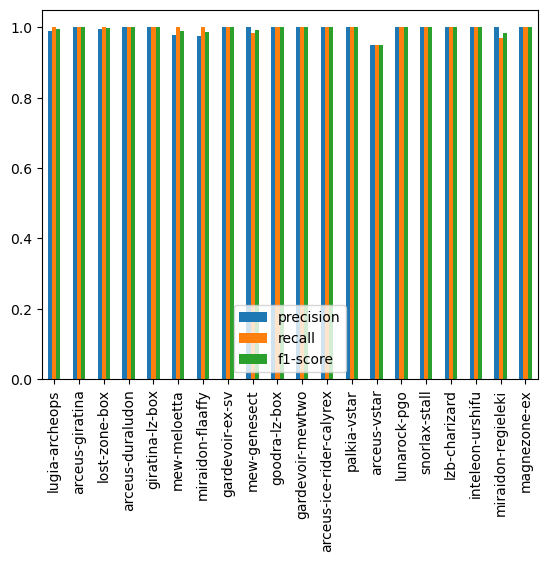

In [107]:
display(pd.DataFrame(modeldf))
modeldf.iloc [0:3,0:20].T.plot(kind="bar")
plt.rcParams['figure.dpi']=100
plt.show()

,lugia-archeops,arceus-giratina,lost-zone-box,arceus-duraludon,giratina-lz-box,mew-meloetta,miraidon-flaaffy,gardevoir-ex-sv,mew-genesect,goodra-lz-box,...,dialga-lost-zone,mimikyu-vmax,blaziken-zeraora,arceus-charizard,ice-rider-calyrex-inteleon,lucario-brs,coviknight-vmax,micro avg,macro avg,weighted avg
precision,0.990196,1.0,0.995238,1.0,1.0,0.977273,0.975610,1.0,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98816,0.591891,0.985289
recall,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.0,0.983607,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98816,0.598876,0.988160
f1-score,0.995074,1.0,0.997613,1.0,1.0,0.988506,0.987654,1.0,0.991736,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98816,0.590767,0.986039
support,101.000000,70.0,209.000000,61.0,65.0,43.000000,40.000000,99.0,61.000000,55.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1098.00000,1098.000000,1098.000000


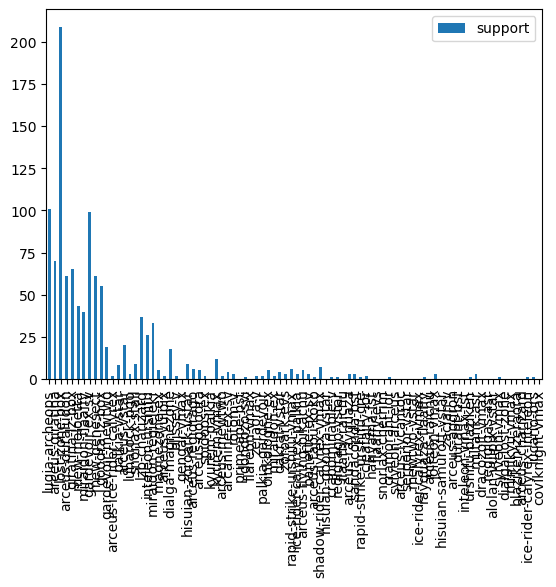

In [106]:
display(pd.DataFrame(modeldf))
modeldf.iloc [3:4,0:86].T.plot(kind="bar")
plt.rcParams['figure.dpi']=100
plt.show()

List of tournaments not included in training/test dataset

 {'game': 'PTCG',
  'name': 'Friday Night Chilling',
  'date': '2023-05-05T15:00:00.000Z',
  'format': 'STANDARD',
  'id': '644fd0a70ed4a405d8bdc833',
  'players': 23},
 {'game': 'PTCG',
  'name': 'The Discard Pile Weekly #14 (GLC Standard) ',
  'date': '2023-05-05T12:00:00.000Z',
  'format': 'STANDARD',
  'id': '644bec0a0ed4a405d8bdb246',
  'players': 5},
 {'game': 'PTCG',
  'name': 'Evans Thursday Throwdown',
  'date': '2023-05-05T01:00:00.000Z',
  'format': 'STANDARD',
  'id': '64543dea0ed4a405d8bdde82',
  'players': 10},
 {'game': 'PTCG',
  'name': 'Poké Deck Torneio Semanal #3',
  'date': '2023-05-05T00:00:00.000Z',
  'format': 'STANDARD',
  'id': '6450796e0ed4a405d8bdcdda',
  'players': 6},
 {'game': 'PTCG',
  'name': 'Free Entry | $130 Store Credit | Qualifier #10',
  'date': '2023-05-04T23:00:00.000Z',
  'format': 'STANDARD',
  'id': '63fe76322fb42a11441fc037',
  'players': 110},
 {'game': 'PTCG',
  'name': 'Rule Zero’s SVI - League #4',
  'date': '2023-05-04T18:00:00.000Z',
  'format': 'STANDARD',
  'id': '644bd4ea0ed4a405d8bdb20f',
  'players': 36},
 {'game': 'PTCG',
  'name': 'MorningTCG Weekly #4 |PTCGL| 100 Codes |',
  'date': '2023-05-04T14:00:00.000Z',
  'format': 'STANDARD',
  'id': '644959d90ed4a405d8bda637',
  'players': 51}

In [83]:
#creat a test query/response
test_tournament_id = "644959d90ed4a405d8bda637"
testresponse = requests.get(url+"/tournaments/"+test_tournament_id+"/standings?"+api_key)
testdata=testresponse.json()

testcards= []
testcards.append("archetype")
testcarddf = pd.DataFrame([], columns=[testcards])
testcarddf["archetype"].astype(str)
testcarddf.head()

testcard_archetypes = []
test_tournament_names = []
decklists = []
deckarch = []

#create testing dataframe
testcarddf = pd.DataFrame(columns=carddf.columns)
testdata
for player in testdata:
    if player["decklist"] is not None:
        if player["deck"]["id"] != "other":
            idx = testcarddf.index.tolist() + ['end']
            testcarddf = testcarddf.reindex(idx, fill_value=0).reset_index(drop=True)
            if "pokemon" in player["decklist"]:
                for card in player["decklist"]["pokemon"]:
                    poke_cardnumber=card["set"]+card["number"]
                    testcarddf.loc[len(testcarddf.index)-1, poke_cardnumber] = card["count"]
            if "trainer" in player["decklist"]:
                for card in player["decklist"]["trainer"]:
                    poke_cardnumber=card["set"]+card["number"]
                    testcarddf.loc[len(testcarddf.index)-1, poke_cardnumber] = card["count"]      
            
            if "energy" in player["decklist"]:
                for card in player["decklist"]["energy"]:
                    if card["number"].isnumeric():
                        poke_cardnumber=card["set"]+card["number"]
                        testcarddf.loc[len(testcarddf.index)-1, poke_cardnumber] = card["count"]    
                    else:  
                        poke_cardnumber="energy"+card["number"]
                        testcarddf.loc[len(testcarddf.index)-1, poke_cardnumber] = card["count"]
            testcarddf.loc[len(testcarddf.index)-1, "archetype"] = player["deck"]["id"]
            if player["deck"]["id"] not in card_archetypes:
                testcard_archetypes.append(player["deck"]["id"])
testcarddf=testcarddf.fillna(0)
testcarddf

X_test=testcarddf.drop(columns=["archetype"])


In [84]:

#fit test dataframe to model outputs
column_list = carddf.columns.tolist()
clean_column_list = [*list(zip(*column_list))[0],]
testcarddf2 = testcarddf[clean_column_list]
X_test2=testcarddf2.drop(testcarddf2["archetype"], axis=1)
y_test2=testcarddf2["archetype"]


In [85]:

# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test2, y_test2))

# Calculate the classification report
predictions = model.predict(X_test2)

trialrep=classification_report(y_test2, predictions,
                            labels=target_names, output_dict=True)

print(trialrep)

Test Acc: 0.980
{'lugia-archeops': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'arceus-giratina': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'lost-zone-box': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6}, 'arceus-duraludon': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'giratina-lz-box': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6}, 'mew-meloetta': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'miraidon-flaaffy': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'gardevoir-ex-sv': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8}, 'mew-genesect': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, 'goodra-lz-box': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'gardevoir-mewtwo': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'arceus-ice-rider-calyrex': {'precision': 0.0, 'recall':

c:\Users\d_hin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\d_hin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\d_hin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\d_hin\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [86]:
trialdf=pd.DataFrame(trialrep)
print(trialdf)

           lugia-archeops  arceus-giratina  lost-zone-box  arceus-duraludon  \
precision             1.0              1.0            1.0               0.0   
recall                1.0              1.0            1.0               0.0   
f1-score              1.0              1.0            1.0               0.0   
support               4.0              1.0            6.0               0.0   

           giratina-lz-box  mew-meloetta  miraidon-flaaffy  gardevoir-ex-sv  \
precision              1.0           0.0               1.0              1.0   
recall                 1.0           0.0               1.0              1.0   
f1-score               1.0           0.0               1.0              1.0   
support                6.0           0.0               1.0              8.0   

           mew-genesect  goodra-lz-box  ...  dialga-lost-zone  mimikyu-vmax  \
precision           1.0            1.0  ...               0.0           0.0   
recall              1.0            1.0  ...       

In [87]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test2, y_test2)}")

Training Data Score: 1.0
Testing Data Score: 0.9795918367346939


,lugia-archeops,arceus-giratina,lost-zone-box,arceus-duraludon,giratina-lz-box,mew-meloetta,miraidon-flaaffy,gardevoir-ex-sv,mew-genesect,goodra-lz-box,...,dialga-lost-zone,mimikyu-vmax,blaziken-zeraora,arceus-charizard,ice-rider-calyrex-inteleon,lucario-brs,coviknight-vmax,micro avg,macro avg,weighted avg
precision,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979592,0.203488,0.969388
recall,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979592,0.209302,0.979592
f1-score,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979592,0.205426,0.972789
support,4.0,1.0,6.0,0.0,6.0,0.0,1.0,8.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.000000,49.000000,49.000000


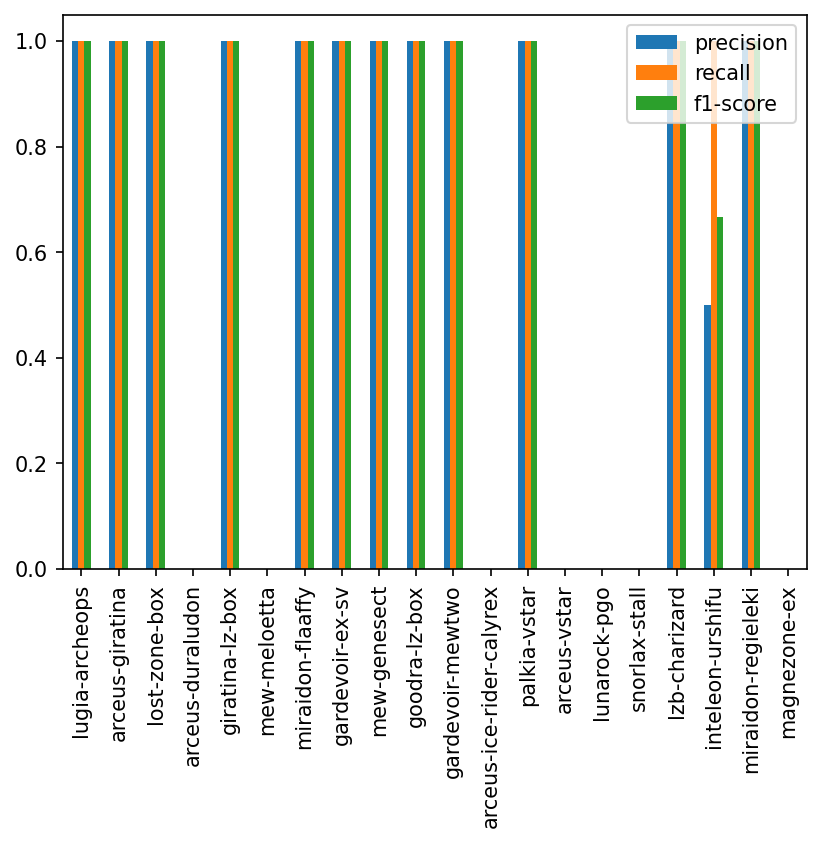

In [105]:
display(pd.DataFrame(trialdf))
trialdf.iloc [0:3,0:20].T.plot(kind="bar")
plt.rcParams['figure.dpi']=100
plt.show()

,lugia-archeops,arceus-giratina,lost-zone-box,arceus-duraludon,giratina-lz-box,mew-meloetta,miraidon-flaaffy,gardevoir-ex-sv,mew-genesect,goodra-lz-box,...,dialga-lost-zone,mimikyu-vmax,blaziken-zeraora,arceus-charizard,ice-rider-calyrex-inteleon,lucario-brs,coviknight-vmax,micro avg,macro avg,weighted avg
precision,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979592,0.203488,0.969388
recall,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979592,0.209302,0.979592
f1-score,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979592,0.205426,0.972789
support,4.0,1.0,6.0,0.0,6.0,0.0,1.0,8.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.000000,49.000000,49.000000


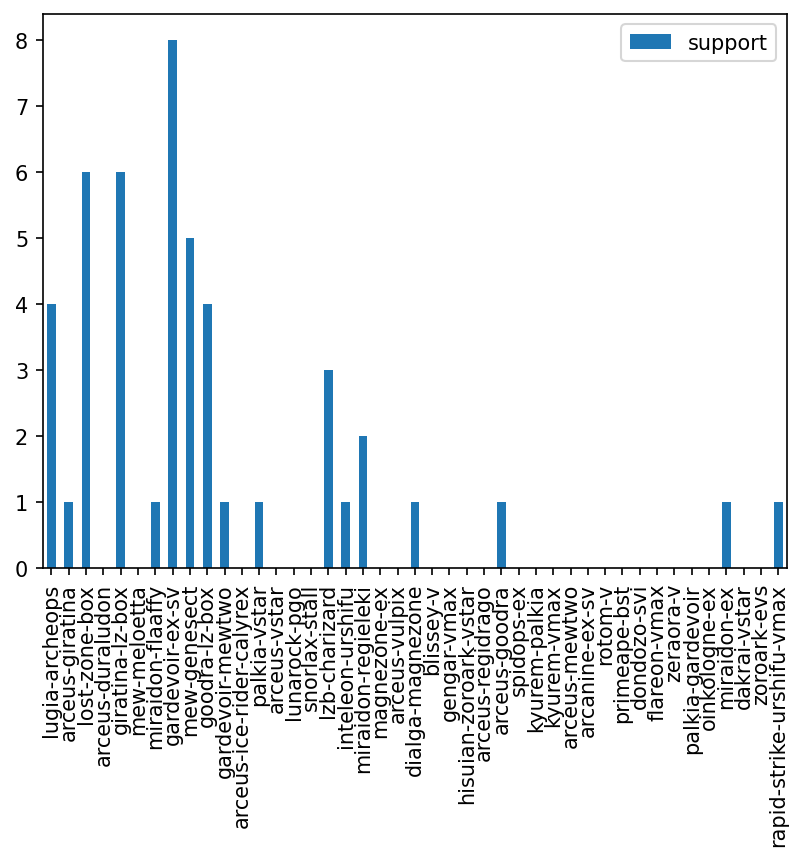

In [113]:
display(pd.DataFrame(trialdf))
trialdf.iloc [3:4,0:43].T.plot(kind="bar")
plt.rcParams['figure.dpi']=100
plt.show()